In [1]:
import strax
fn = 'test_records'

In [2]:
# In case you deleted test_records, remake it from a pax file like this:
# records = strax.frompax.pax_to_records(
#     'XENON1T-15204-000007000-000007099-000000100.zip')
# strax.data.save_records(fn, records)

In [3]:
# Make the fake reader output
records = strax.data.load_records(fn)
strax.fakedaq.reader_split(records, 'fake_daq_output')

In [4]:
# Process with slow compression (small files)
records = strax.process.load_from_readers('fake_daq_output')
bls = strax.process.baseline(records)

In [5]:
%%time
strax.data.save_records_compressed('test_bz2', records, compressor='bz2')

Wall time: 12.3 s


(1, 13164.556099738964)

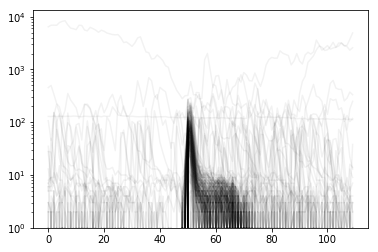

In [40]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

for i in np.random.randint(0, high=len(records), size=200):
    plt.plot(records[i]['data'], c='k', alpha=0.05)
plt.yscale('log')
plt.ylim(1, None)

Benchmark the whole thing.

If you run this before the other cells, it will seem slower the first time due to numba's just-in-time compilation.

In [7]:
%%time
strax.process.process('fake_daq_output', 'test_output_fast')

Wall time: 1.75 s


39 bz2, 54 zstd
(48, 48): 48 bz2, 67 zstd

In [10]:
312/39

8.0

In [11]:
133/39

3.41025641025641